In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [2]:
import pandas as pd
df_ecfp6 = pd.read_csv('data_ecfp6_bits_crystal.csv', header=None)
df_maccs = pd.read_csv('data_maccs_crystal.csv', header=None)
frames = [df_ecfp6, df_maccs]

In [3]:
df = pd.concat(frames, axis=1, join="inner")

In [4]:
import numpy as np
X = np.array(df)

In [5]:
X

array([[1, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 1, 0, ..., 1, 1, 0],
       [0, 1, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]])

In [6]:
data = pd.read_csv('bandgap_crystal_optimized.csv').bandgap_crystal

In [7]:
data.head()

0    7.9012
1    7.2705
2    7.9703
3    7.5725
4    6.5419
Name: bandgap_crystal, dtype: float64

In [8]:
Y = np.array(data)

In [9]:
Y.shape

(236,)

In [10]:
X.shape

(236, 2215)

In [11]:
from sklearn.feature_selection import RFE
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [12]:
X_train.shape, Y_train.shape

((188, 2215), (188,))

In [13]:
X_test.shape, Y_test.shape

((48, 2215), (48,))

# Gradient Boosting regressor


In [14]:
from sklearn.ensemble import GradientBoostingRegressor

In [60]:
gbt = GradientBoostingRegressor(random_state=34, n_estimators=1200, learning_rate=0.01, max_depth=25, subsample=0.5)

In [61]:
gbt.fit(X_train, Y_train)
r2_train_gbt = gbt.score(X_train, Y_train)
r2_test_gbt = gbt.score(X_test, Y_test)

In [62]:
r2_train_gbt, r2_test_gbt

(0.9999882671696624, 0.8066179610552074)

In [63]:
Y_pred_gbt = gbt.predict(X_test)
Y_pred_train_gbt = gbt.predict(X_train)

In [64]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [65]:
r2_score(Y_train, Y_pred_train_gbt) , r2_score(Y_test, Y_pred_gbt) 

(0.9999882671696624, 0.8066179610552074)

In [66]:
mean_squared_error(Y_train, Y_pred_train_gbt)**0.5, mean_squared_error(Y_test, Y_pred_gbt)**0.5

(0.00629114163536106, 0.5987768675946895)

/Users/sachith/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

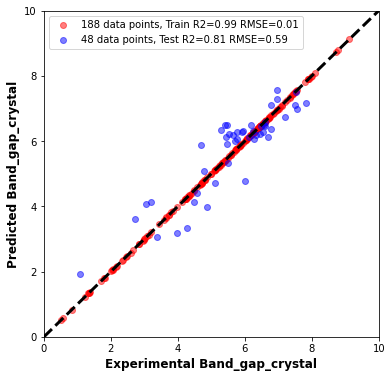

In [72]:
ax_gbt = sns.regplot(Y_train, Y_pred_train_gbt, color='r', scatter_kws={'alpha':0.5}, fit_reg=False)
ax_gbt = sns.regplot(Y_test, Y_pred_gbt, color='b', scatter_kws={'alpha':0.5}, fit_reg=False)

ax_gbt.set_xlabel('Experimental Band_gap_crystal', fontsize='large', fontweight='bold')
ax_gbt.set_ylabel('Predicted Band_gap_crystal', fontsize='large', fontweight='bold')
ax_gbt.set_xlim(0, 10)
ax_gbt.set_ylim(0, 10)
xpoints = ypoints = plt.xlim()

ax_gbt.legend(labels=["188 data points, Train R2=0.99 RMSE=0.01","48 data points, Test R2=0.81 RMSE=0.59"])
ax_gbt.figure.set_size_inches(6, 6)
plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=3, scalex=False, scaley=False)
plt.show

In [73]:
r2_score(Y_train, Y_pred_train_gbt) , r2_score(Y_test, Y_pred_gbt) 

(0.9999882671696624, 0.8066179610552074)

In [74]:
mean_squared_error(Y_train, Y_pred_train_gbt)**0.5, mean_squared_error(Y_test, Y_pred_gbt)**0.5

(0.00629114163536106, 0.5987768675946895)